# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [89]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [90]:
iris = load_iris()
dfx = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
dfx.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [91]:
from sklearn.model_selection import *
train_x, test_x, train_y, test_y = train_test_split(dfx, y, test_size=0.2, random_state=2022)

In [92]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((120, 4), (30, 4), (120,), (30,))

## **sepal끼리, petal끼리**

In [93]:
train_xs = train_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
train_xp = train_x.loc[:, ['petal length (cm)', 'petal width (cm)']]
test_xs = test_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
test_xp = test_x.loc[:, ['petal length (cm)', 'petal width (cm)']]

train_xs.shape, train_xp.shape

((120, 2), (120, 2))

## One-hot Encoding

In [94]:
from tensorflow.keras.utils import to_categorical
y_len = len(set(train_y))

In [95]:
train_y = to_categorical(train_y, y_len)
test_y = to_categorical(train_y, y_len)

train_y.shape

(120, 3)

## Modeling : multi-input & Add layer

In [96]:
keras.backend.clear_session()

a = keras.layers.Input(shape=(2,), name='sepal_input')
hl_s = keras.layers.Dense(4, activation='relu')(a)

b = keras.layers.Input(shape=(2,), name='petal_input')
hl_p = keras.layers.Dense(4, activation='relu')(b)

ad = keras.layers.Add(name='add_layer')([hl_s, hl_p])
ol = keras.layers.Dense(3, activation='softmax')(ad)

model = keras.models.Model([a, b], ol)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sepal_input (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 petal_input (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['sepal_input[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['petal_input[0][0]']            
                                                                                              

## 모델 시각화

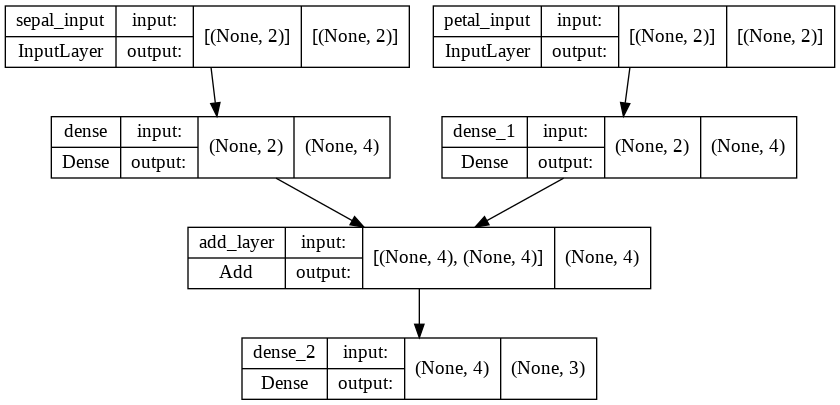

In [97]:
keras.utils.plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [98]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [99]:
model.fit([train_xs, train_xp], train_y, validation_split=0.15, epochs=100, verbose=1, callbacks=[es])

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 2.0321 - accuracy: 0.3235 - val_loss: 2.1701 - val_accuracy: 0.2222
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.9591 - accuracy: 0.3235 - val_loss: 2.0866 - val_accuracy: 0.2222
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 1.8830 - accuracy: 0.3235 - val_loss: 2.0084 - val_accuracy: 0.2222
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.8157 - accuracy: 0.3235 - val_loss: 1.9348 - val_accuracy: 0.2222
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.7496 - accuracy: 0.3235 - val_loss: 1.8660 - val_accuracy: 0.2222
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.6902 - accuracy: 0.3235 - val_loss: 1.8008 - val_accuracy: 0.2222
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 1.6325 - accuracy: 0.3235 - val_loss: 1.7416 - val_accuracy: 0.2222
Epoch 8/100
4/4 [===